In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("../../../Data/concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(824, 8) (206, 8) (824,) (206,)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


# 1. Using Yeo Jhonson Power Transformer

In [27]:
from sklearn.preprocessing import PowerTransformer
ptrf = PowerTransformer()
X_train_trf_yeo = ptrf.fit_transform(X_train)
X_test_trf_yeo = ptrf.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train_trf_yeo,y_train)
y_pred = lr.predict(X_test_trf_yeo)
r2_score(y_test,y_pred)

0.8161906513354854

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_trf_yeo,y_train)
y_pred = dtr.predict(X_test_trf_yeo)
r2_score(y_test,y_pred)

0.8319361007376502

# 2. Using Yeo Box-Cox Power Transformer

In [30]:
# note : The Box-Cox transformation can only be applied to strictly positive data
ptrf = PowerTransformer(method='box-cox')
X_train_trf_box = ptrf.fit_transform(X_train + 0.0000000001)
X_test_trf_box = ptrf.transform(X_test + 0.0000000001 )

In [31]:
lr = LinearRegression()
lr.fit(X_train_trf_box,y_train)
y_pred = lr.predict(X_test_trf_box)
r2_score(y_test,y_pred)

0.8031951642008499

In [32]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_trf_box,y_train)
y_pred = dtr.predict(X_test_trf_box)
r2_score(y_test,y_pred)

0.8404771142813692

# Distribution Check

In [33]:
import scipy.stats as stats

C:\Users\Jehan\AppData\Local\Temp\ipykernel_7948\4078012489.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_7948\4078012489.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf_yeo[index])
C:\Users\Jehan\AppData\Local\Temp\

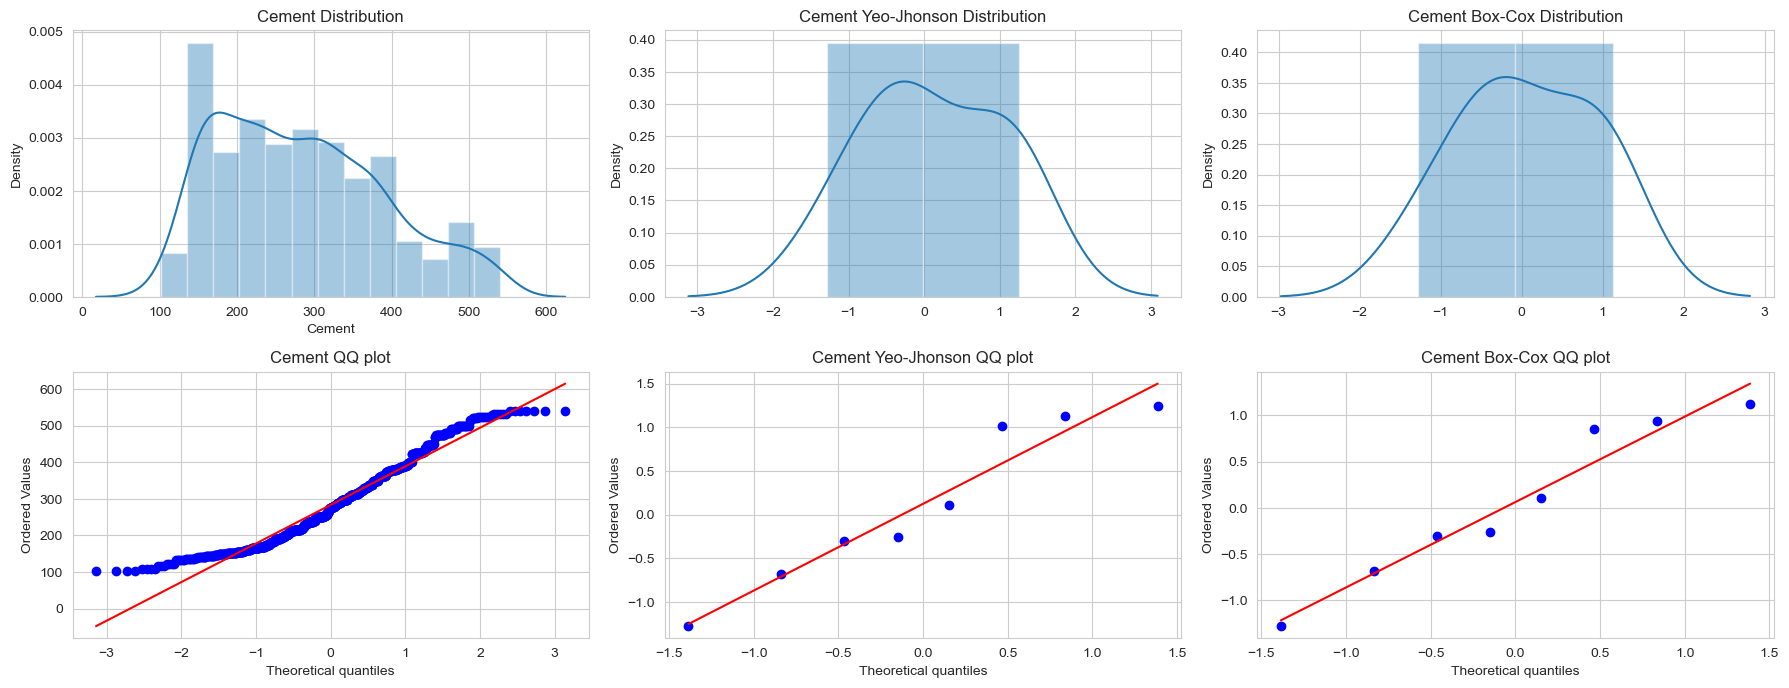

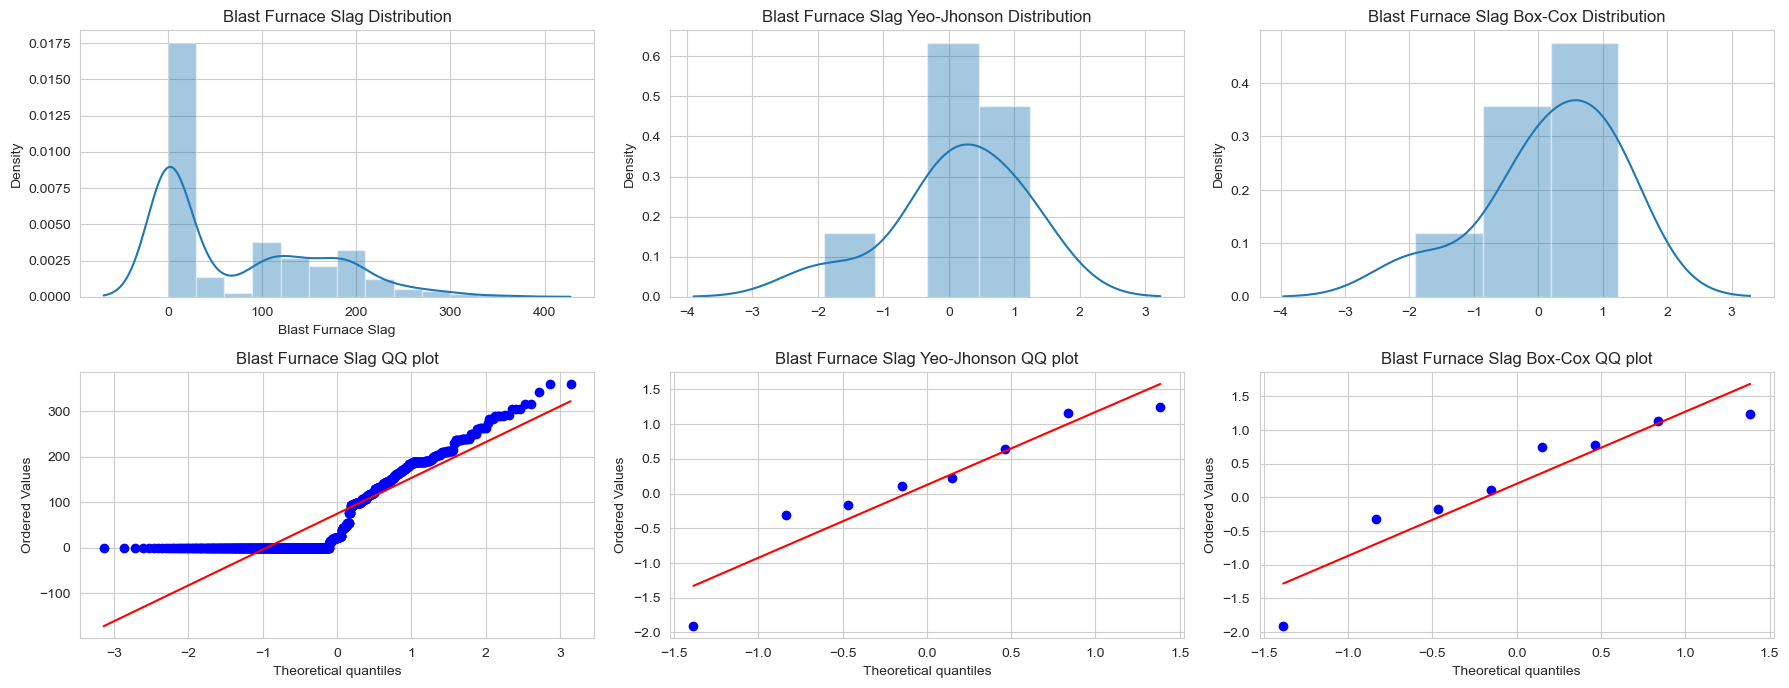

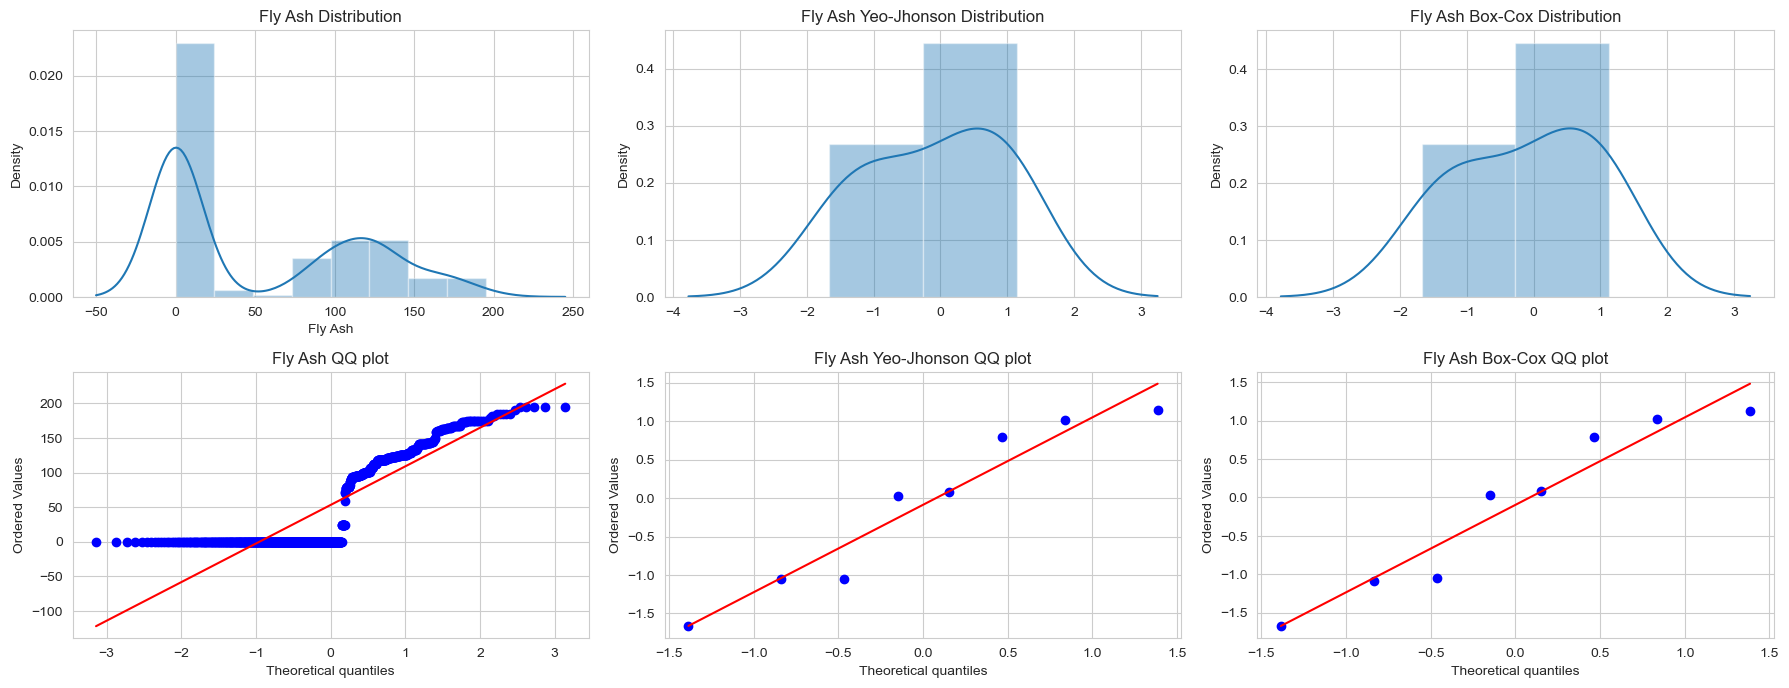

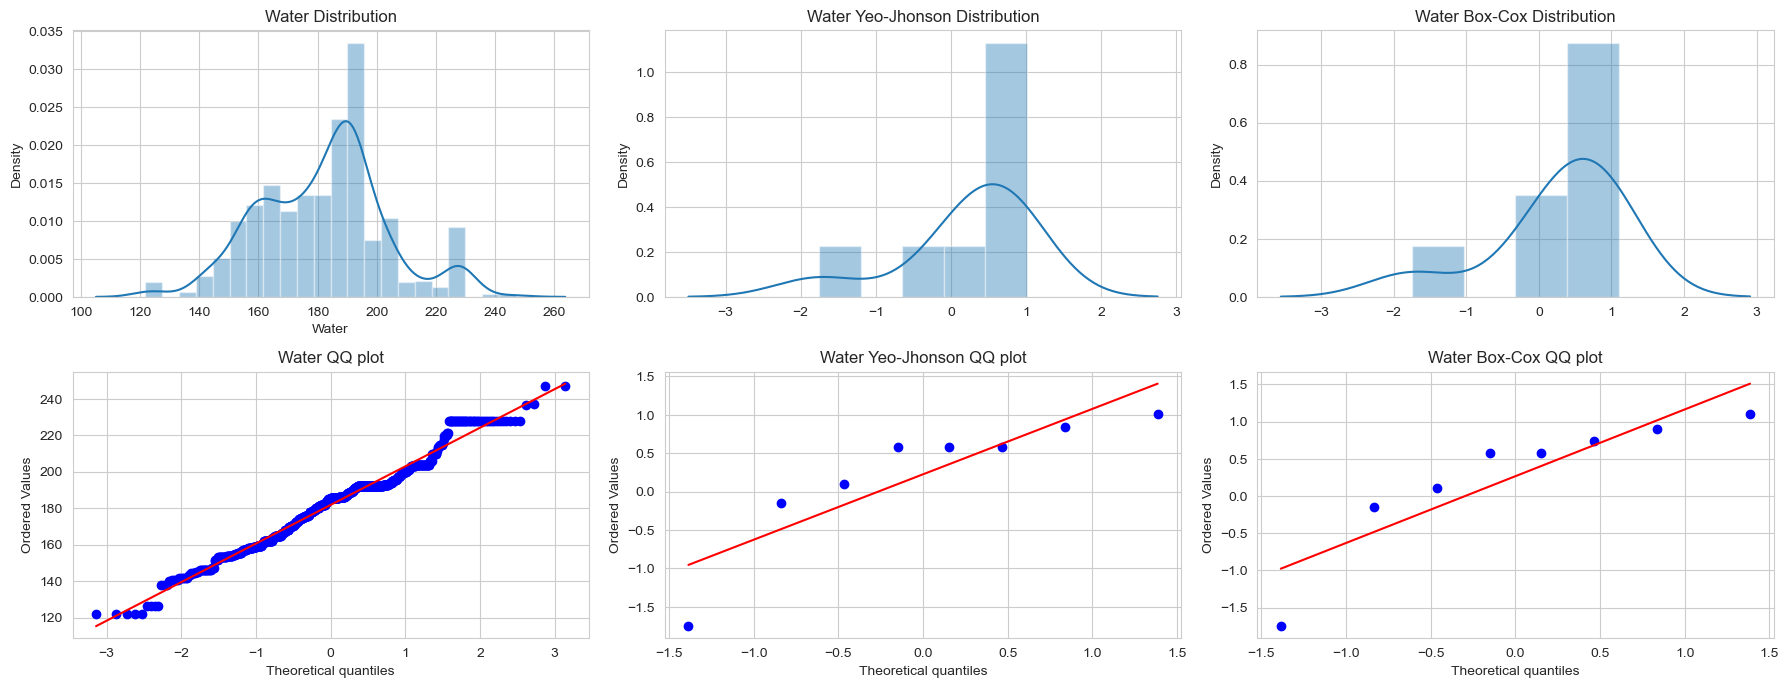

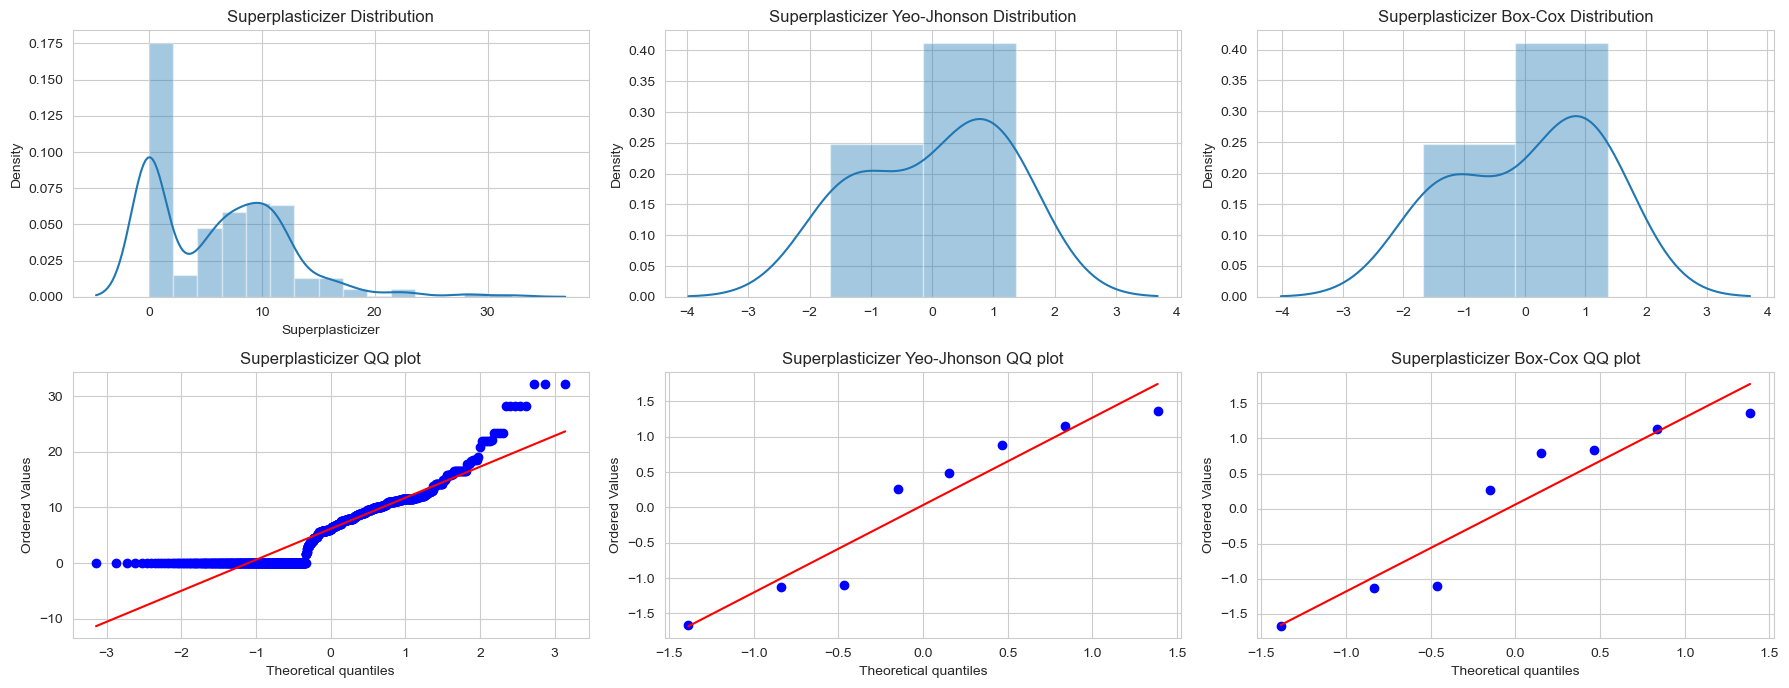

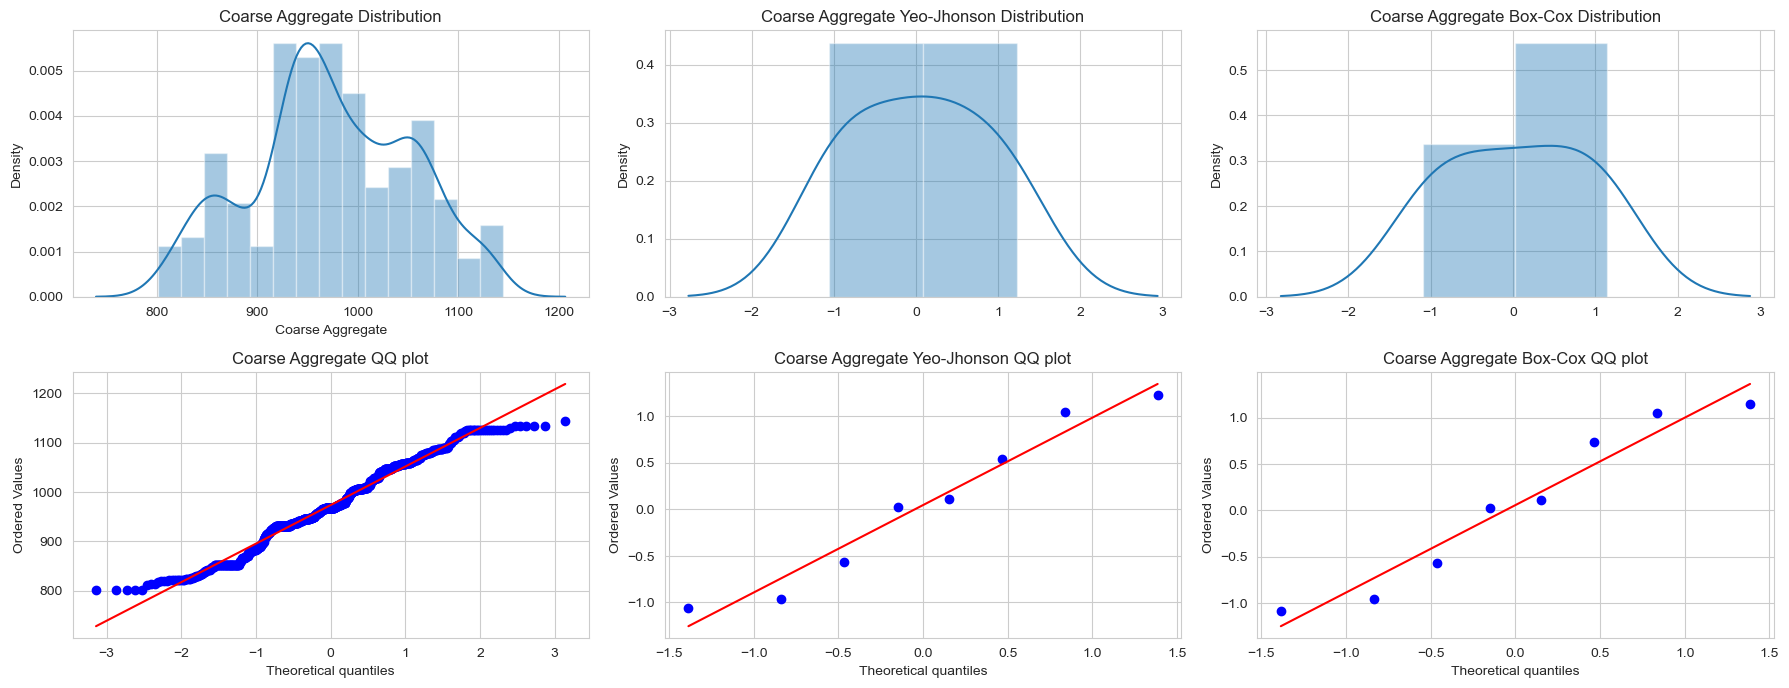

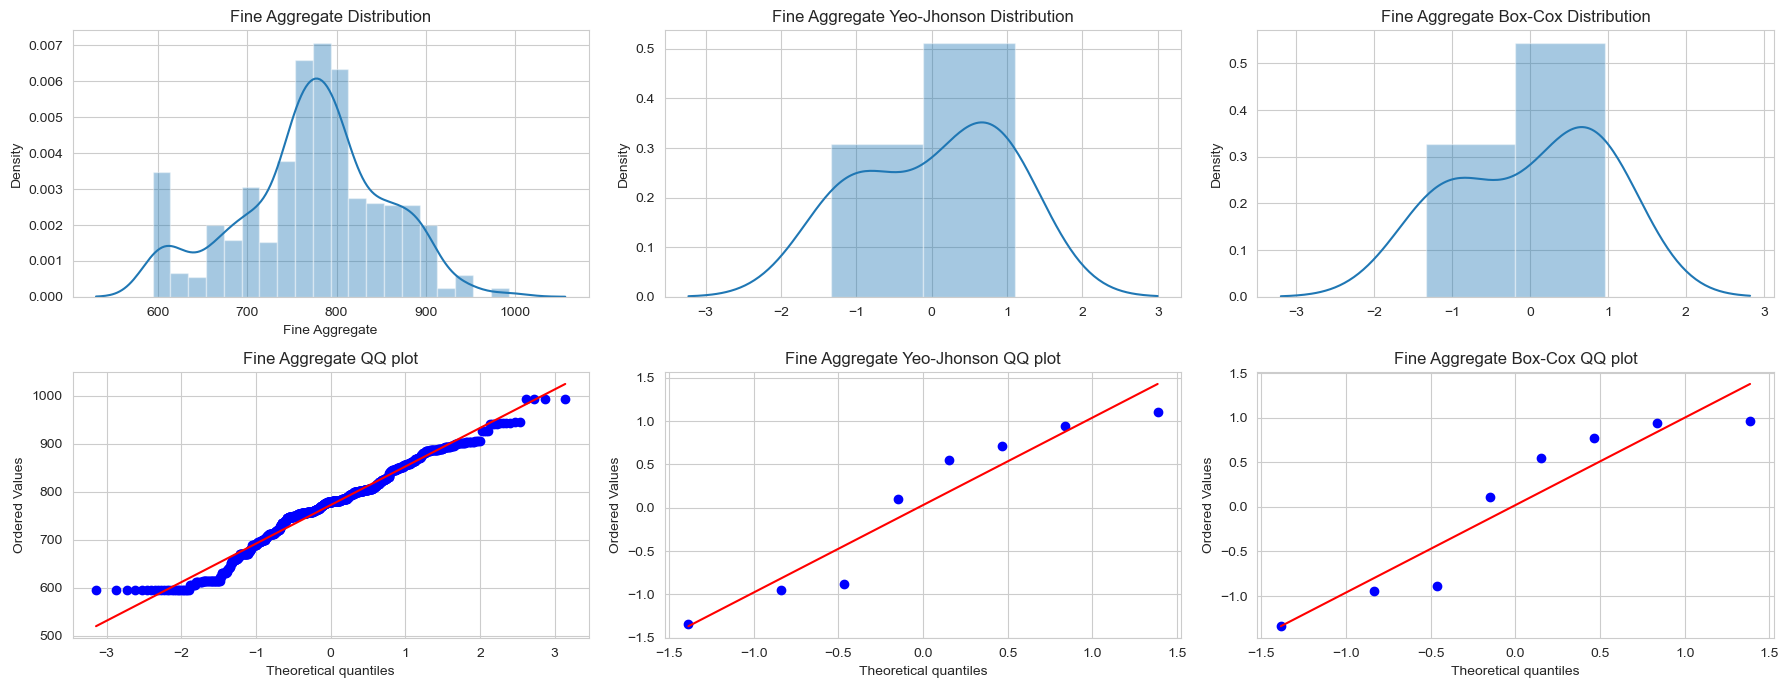

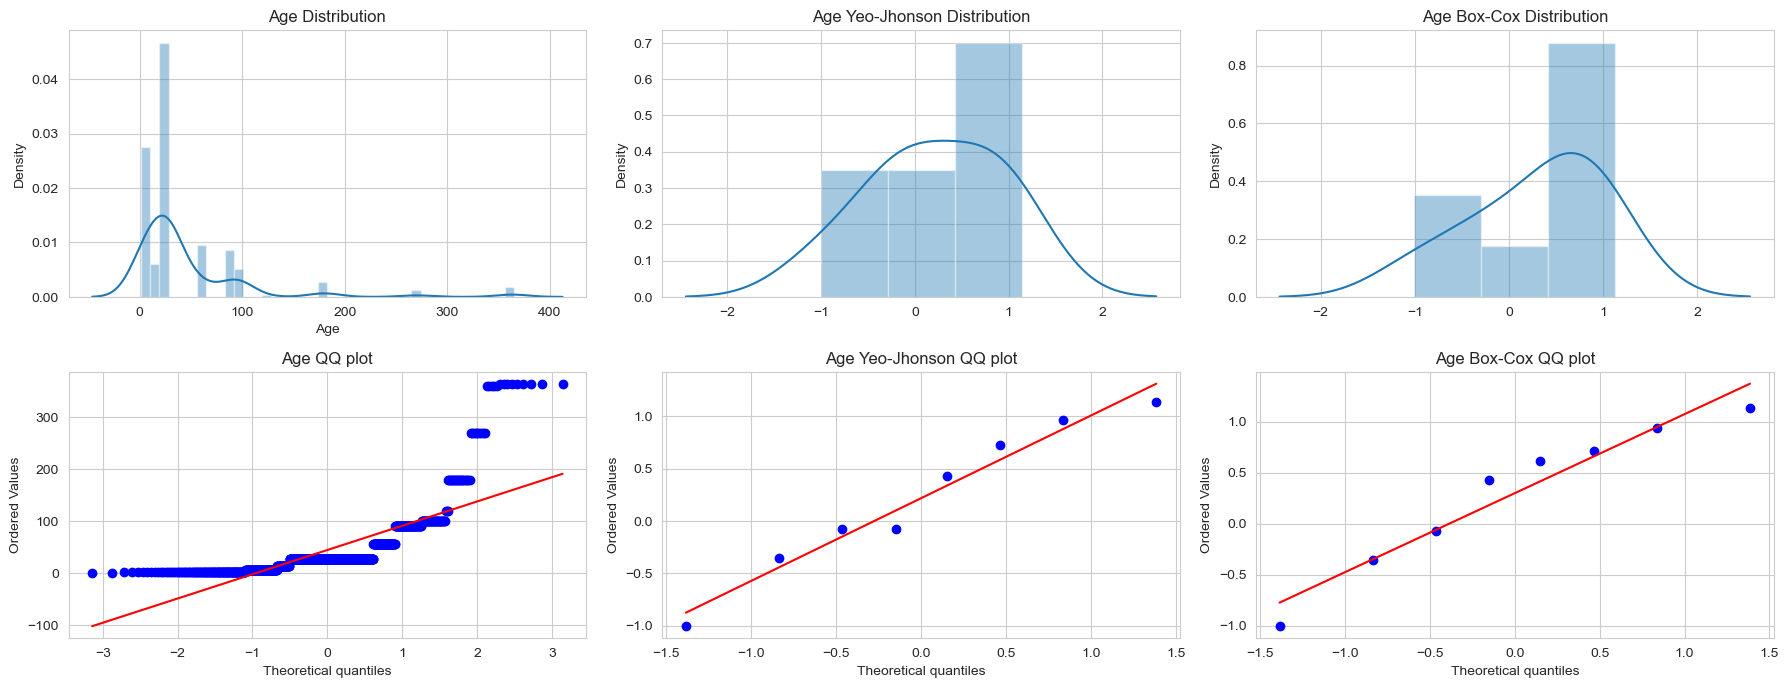

In [41]:
for index, col in enumerate(X_train.columns):    
    plt.figure(figsize=(18,10))
    
    plt.subplot(331)
    sns.distplot(X_train[col])
    plt.title(f'{col} Distribution')
    
    plt.subplot(332)
    sns.distplot(X_train_trf_yeo[index])
    plt.title(f'{col} Yeo-Jhonson Distribution')
    
    plt.subplot(333)
    sns.distplot(X_train_trf_box[index])
    plt.title(f'{col} Box-Cox Distribution')
    
    
    plt.subplot(334)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(f'{col} QQ plot')
    
    plt.subplot(335)
    stats.probplot(X_train_trf_yeo[index], dist='norm', plot=plt)
    plt.title(f'{col} Yeo-Jhonson QQ plot')
    
    plt.subplot(336)
    stats.probplot(X_train_trf_box[index], dist='norm', plot=plt)
    plt.title(f'{col} Box-Cox QQ plot')
    
    plt.tight_layout()